# K-means Clustering on Wisconsin Breast Cancer Dataset
Implementation of k-means clustering algorithm on the Wisconsin Breast Cancer dataset with visualization of results.

Confusion Matrix:
[[175  37]
 [ 13 344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



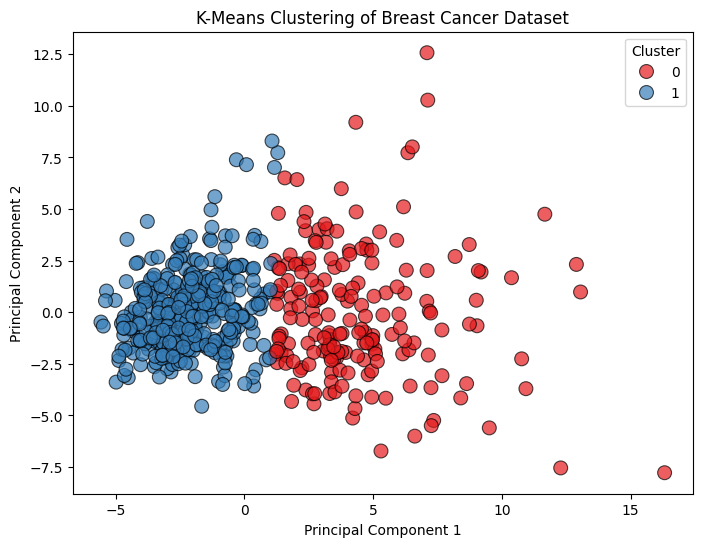

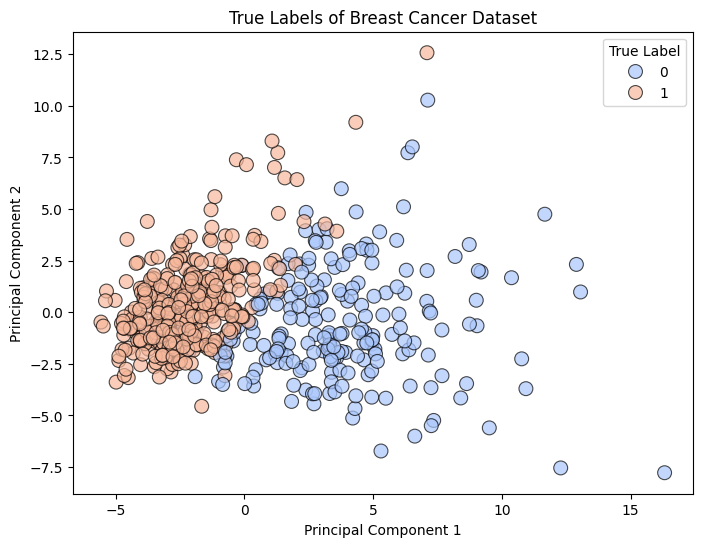

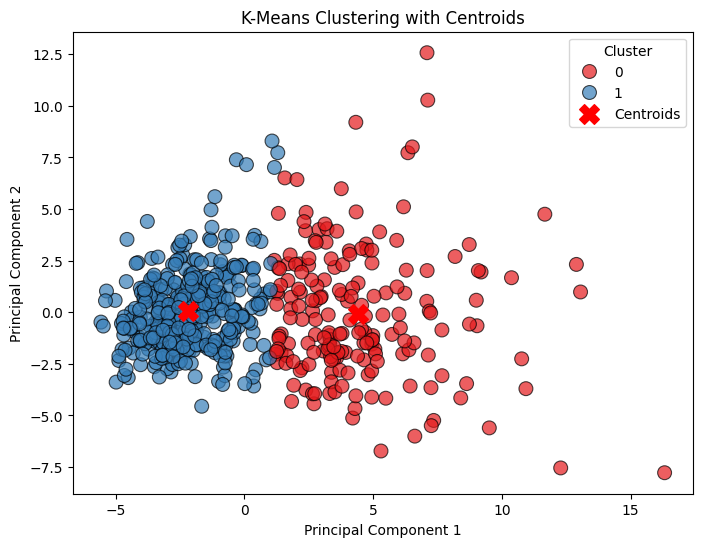

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load and preprocess the data
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# 3. Evaluate the clustering results
print("Confusion Matrix:")
print(confusion_matrix(y, y_kmeans))
print("\nClassification Report:")
print(classification_report(y, y_kmeans))

# 4. Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create dataframe with PCA results
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y

# 5. Visualizations

# Plot 1: K-means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', 
                palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

# Plot 2: True labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True Label', 
                palette='coolwarm', s=100, edgecolor='black', alpha=0.7)
plt.title('True Labels of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="True Label")
plt.show()

# Plot 3: K-means clusters with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', 
                palette='Set1', s=100, edgecolor='black', alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

[[175  37]
 [ 13 344]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



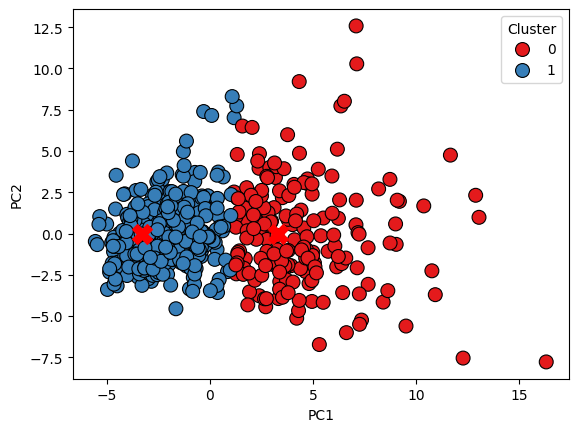

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

kmeans = KMeans(2, random_state=42).fit(X)
labels = kmeans.labels_

print(confusion_matrix(data.target, labels))
print(classification_report(data.target, labels))

pca = PCA(2).fit_transform(X)
df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
df['Cluster'] = labels

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set1', s=100, edgecolor='k')
plt.scatter(*PCA(2).fit_transform(kmeans.cluster_centers_).T, c='red', marker='X', s=200)
plt.show()
